In [1]:
import pandas
import requests

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
datasets_url = (
    "https://raw.githubusercontent.com/lutydlitatova/czechitas-datasets/main/datasets"
)

r = requests.get(f"{datasets_url}/wine-quality.csv")
open("wine-quality.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-quality-targets.csv")
open("wine-quality-targets.csv", "wb").write(r.content)

r = requests.get(f"{datasets_url}/wine-regions.csv")
open("wine-regions.csv", "wb").write(r.content)
r = requests.get(f"{datasets_url}/wine-regions-targets.csv")
open("wine-regions-targets.csv", "wb").write(r.content)

363

In [2]:
X = pandas.read_csv("wine-regions.csv")
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(X)

In [5]:
silhouette_score(X, labels)


0.28594199657074876

In [19]:
tsne = TSNE(
    init="pca",
    n_components=2,
    perplexity=10,
    learning_rate="auto",
    random_state=0,
)
X_2 = tsne.fit_transform(X)

c:\users\klara\pycharmprojects\kurzpython2\venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [20]:
model = KMeans(n_clusters=3, random_state=0)
labels = model.fit_predict(X_2)

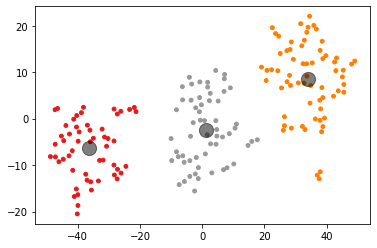

In [21]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, s=15, cmap="Set1")
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

In [22]:
silhouette_score(X_2, labels)

0.62408817